In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
%matplotlib inline


Network Model

In [2]:

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.layer1=nn.Sequential(
            nn.Conv2d(3,32,3,2,1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
            nn.Conv2d(32,64,3,2,1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            
            nn.Conv2d(64,128,3,2,1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.layer2=nn.Sequential(
            nn.Linear(128*4*4,128,bias=True),
            nn.Sigmoid(),
            nn.Linear(128,10,bias=True),
            nn.Sigmoid()
        )
    
    def forward(self,x):
        out=self.layer1(x)
        out=out.view(out.size(0),-1)
        out=self.layer2(out)
        return out
    

Download Data

In [4]:
trans=transforms.Compose([transforms.ToTensor()])

train_set=dsets.CIFAR10(root='./CIFAR10',train=True,download=True,transform=trans)
train_loader=DataLoader(dataset=train_set,shuffle=True,batch_size=64)

test_set=dsets.CIFAR10(root='./CIFAR10',train=False,download=True,transform=trans)
test_loader=DataLoader(dataset=test_set,shuffle=True,batch_size=64)

Files already downloaded and verified
Files already downloaded and verified


Train

In [5]:
GPU=True

model=Net()

criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters())

if GPU:
    model=model.to('cuda')
    criterion=criterion.to('cuda')
    
for epoch in range(15):
    avg_cost=0.0
    for X,Y in train_loader:
        if GPU:
            X,Y=X.to('cuda'),Y.to('cuda')
        
        hypothesis=model(X)
        
        cost=criterion(hypothesis,Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        avg_cost+=cost.item()
        
    avg_cost/=len(train_loader)
    print('Epoch {}, cost = {:.9f}'.format(epoch,avg_cost))
        

Epoch 0, cost = 1.931686477
Epoch 1, cost = 1.808656009
Epoch 2, cost = 1.756823983
Epoch 3, cost = 1.718825387
Epoch 4, cost = 1.689883124
Epoch 5, cost = 1.667040643
Epoch 6, cost = 1.647536059
Epoch 7, cost = 1.629674425
Epoch 8, cost = 1.615868066
Epoch 9, cost = 1.603408310
Epoch 10, cost = 1.591456767
Epoch 11, cost = 1.580173865
Epoch 12, cost = 1.571520287
Epoch 13, cost = 1.564063676
Epoch 14, cost = 1.556665942


Test

	 frog 	 ship 	 dog 	 cat 

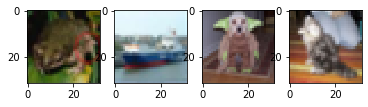

Accuracy = tensor(0.7039, device='cuda:0')


In [9]:

accuracy=0.0

classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

for X,Y in test_loader:
    if GPU:
        X,Y=X.to('cuda'),Y.to('cuda')
    
    predict=model(X)
    
    acc=(predict.argmax(1)==Y).float().mean()
    
    accuracy+=acc
else:
    fig,(axes)=plt.subplots(1,4)
    
    for i,ax in enumerate(axes):
        ax.imshow(X[i].view(3,32,32).permute(1,2,0).cpu().numpy())
        print('\t',classes[predict[i].argmax()],end=' ')
    plt.show()
    
accuracy/=len(test_loader)

print('Accuracy =',accuracy)